In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from notebook_utils import load_pickle, get_max_tile_frequency, plot_max_tile_distribution
import datetime
import pandas as pd
import os

#### PLEASE MAKE SURE YOU USE PYTHON 3.8 >=

In [29]:
jobs = list(filter(lambda x: x not in ['.ipynb_checkpoints', 'experiment_analysis.ipynb', '__pycache__', 'notebook_utils.py', 'strategy_analysis.ipynb'], os.listdir()))

'''Your jobs are'''
for j, job in enumerate(jobs):
    print(j,job)

0 baselines.ipynb
1 conv-sss
2 dense
3 e1
4 e2-cont
5 e2-cont2
6 e2-no-eps-to-epsilon-2000
7 e3-no-episodes-to-epsilon-50
8 e4-training-occurs-earlier-target-updated-less
9 e5-small-epsilon
10 e6-small-epsilon-lr-1e-3
11 e7-small-epsilon-lr-1e-4
12 e8
13 e9
14 Experiment 1
15 Experiment 2
16 Experiment 3
17 Experiment 4
18 Experiment 5
19 exp_1_393905355991763200
20 exp_2_914485232672149760
21 exp_3_237510587463639552
22 final-conv
23 random_baseline
24 SSS_replay
25 untitled.txt
26 upleft_baseline


In [30]:
job_name = jobs[24]
# Load episode data, hyper parameters and runtime from saved pickle objects
episodes = load_pickle(job_name, 'episodes.p')
hyperparameters = load_pickle(job_name, 'hyperparameters.p')
runtime = load_pickle(job_name, 'runtime.p')

# Load episodes into Pandas df and convert to numpy array to facilitate plotting
# [{'max_tile': 32, 'merge_score': 376, 'number': 0, 'reward': 1, 'epsilon': 1.0, 'number_moves': 67}, ...]
# array([[ 32., 376.,   0.,   1.,   1.,  67.], ...])
episode_matrix = pd.DataFrame(episodes).values 

print(f"{job_name} ran for {datetime.timedelta(seconds=runtime)},  {len(episodes)} episodes\n")

'''Print Hyperparameters'''
print("Hyper parameters")
for key in hyperparameters:
    print(key, "=", hyperparameters[key])

SSS_replay ran for 17:48:41.040000,  17758 episodes

Hyper parameters
batch_size = 5000
discount_factor = 0.95
model = Sequential(
  (0): Conv2d(1, 64, kernel_size=(2, 2), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=256, out_features=64, bias=True)
  (6): Linear(in_features=64, out_features=4, bias=True)
)
replay_buffer_length = 15000
learning_rate = 0.0001
loss_fn = MSELoss()
optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)
no_episodes = 30000
no_episodes_to_reach_epsilon = 500
no_episodes_before_training = 50
no_episodes_before_updating_target = 100
no_episodes_to_fill_up_existing_model_replay_buffer = 0
min_epsilon = 0.01
use_double_dqn = True
snapshot_game_every_n_episodes = 500


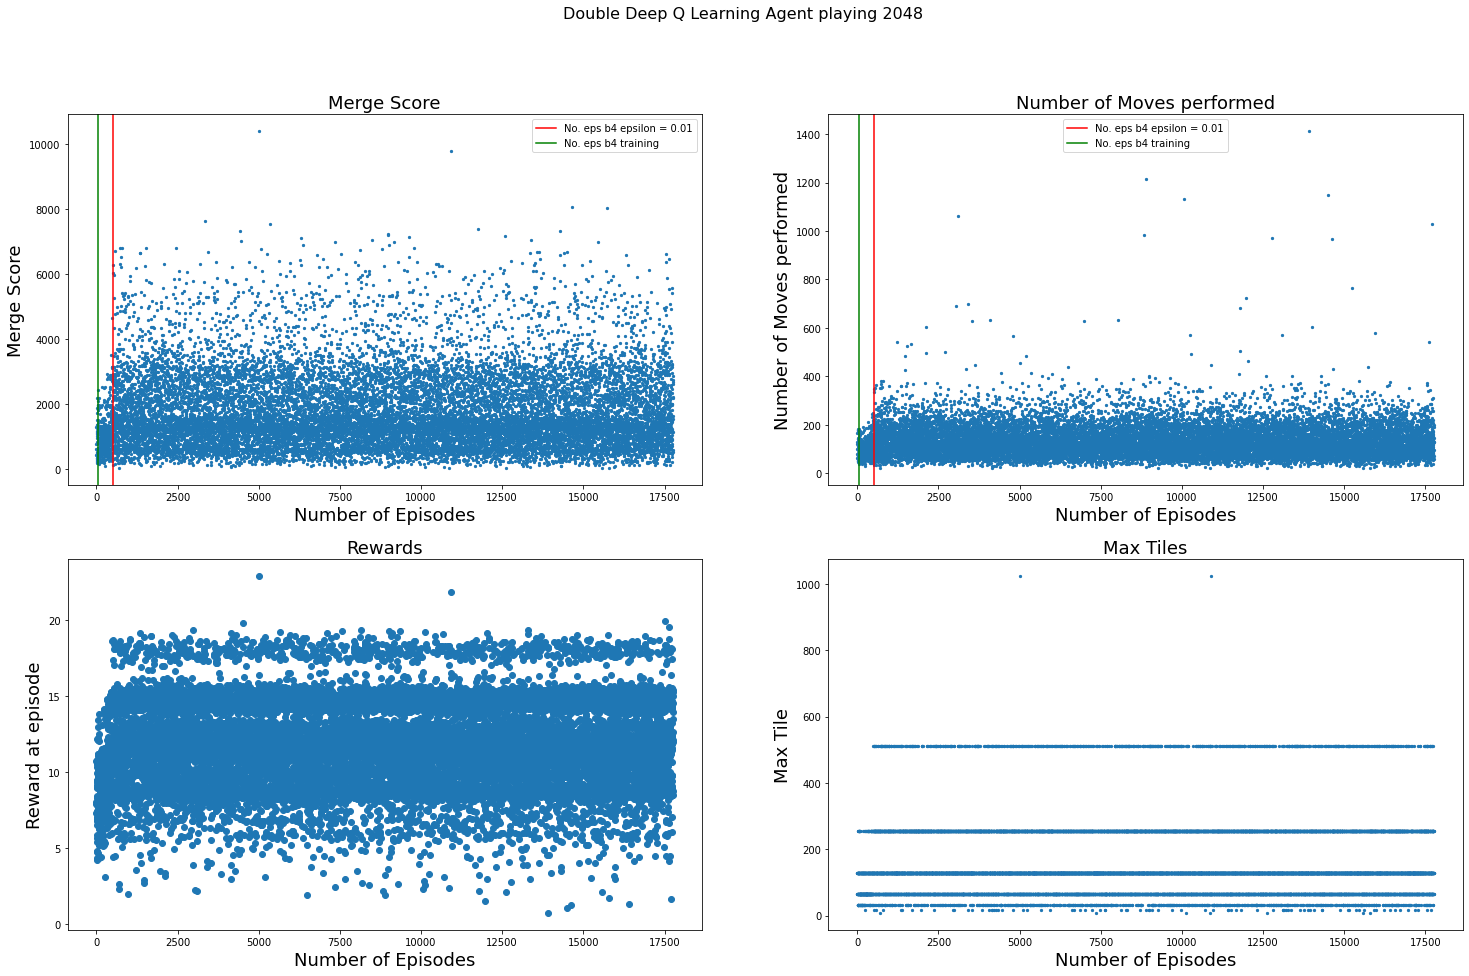

In [52]:
# [{'max_tile': 32, 'merge_score': 376, 'number': 0, 'reward': 1, 'epsilon': 1.0, 'number_moves': 67}, ...]
# array([[ 32., 376.,   0.,   1.,   1.,  67.], ...])
s = 5


try:
    max_tiles = episode_matrix.T[0]
    merge_scores = episode_matrix.T[1]
    iteration = episode_matrix.T[2]
    rewards = episode_matrix.T[3]
    epsilon = episode_matrix.T[4]
    q_values = episode_matrix.T[5]
    number_of_moves = episode_matrix.T[6]
except IndexError:
    max_tiles = episode_matrix.T[0]
    merge_scores = episode_matrix.T[1]
    iteration = episode_matrix.T[2]
    rewards = episode_matrix.T[3]
    epsilon = episode_matrix.T[4]
    number_of_moves = episode_matrix.T[5]

fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# ax1.set_yscale('log', base=2)
#ax1.set_yscale('log', base=2)

title = "Deep Q Learning Agent playing 2048"
if hyperparameters['use_double_dqn']:
    title = "Double " + title
fig.suptitle(title, fontsize=16)


ax1.scatter(iteration, merge_scores, s=s)
ax1.set_title("Merge Score", fontsize=18)
ax1.set_ylabel("Merge Score", fontsize=18)
ax1.set_xlabel("Number of Episodes", fontsize=18)
ax1.axvline(x=hyperparameters["no_episodes_to_reach_epsilon"], c='r', label=f"No. eps b4 epsilon = {hyperparameters['min_epsilon']}")
ax1.axvline(x=hyperparameters["no_episodes_before_training"], c='g', label="No. eps b4 training")
ax1.legend()

ax4.scatter(iteration, max_tiles, s=s)
ax4.set_title("Max Tiles",  fontsize=18)
ax4.set_ylabel("Max Tile", fontsize=18)
ax4.set_xlabel("Number of Episodes", fontsize=18)

ax3.scatter(iteration, rewards)
ax3.set_title("Rewards", fontsize=18)
ax3.set_ylabel("Reward at episode", fontsize=18)
ax3.set_xlabel("Number of Episodes", fontsize=18)

ax2.scatter(iteration, number_of_moves, s=s)
ax2.set_title("Number of Moves performed", fontsize=18)
ax2.set_ylabel("Number of Moves performed", fontsize=18)
ax2.axvline(x=hyperparameters["no_episodes_to_reach_epsilon"], c='r', label=f"No. eps b4 epsilon = {hyperparameters['min_epsilon']}")
ax2.axvline(x=hyperparameters["no_episodes_before_training"], c='g', label="No. eps b4 training")
ax2.legend()
ax2.set_xlabel("Number of Episodes", fontsize=18)

plt.show()

max tiles: [   8   16   32   64  128  256  512 1024]
frequency: [   7   84  742 4100 7344 4799  680    2]
percentage: [0.04 0.47 4.18 23.09 41.36 27.02 3.83 0.01]
total episodes: 17758


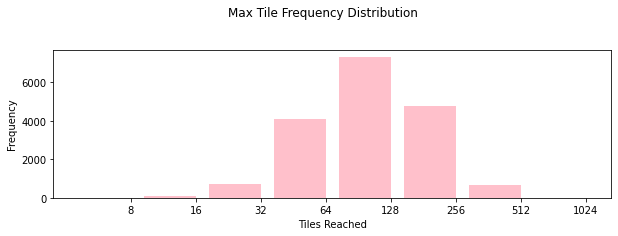

In [115]:

fig = plt.figure(figsize=(10,6))
fig.suptitle("Max Tile Frequency Distribution")
base_ax = fig.add_subplot(211)


max_tile_frequency = get_max_tile_frequency(max_tiles[:])
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:.2f}'.format})

def frequency_percentage(tile_frequency):
    ret_val = np.zeros(tile_frequency.shape, dtype=np.float)
    total = np.sum(tile_frequency[1])
    ret_val = (tile_frequency[1] / total)*100
    return ret_val
    


plot_max_tile_distribution(max_tile_frequency, base_ax)

print("max tiles:", max_tile_frequency[0])
print("frequency:", max_tile_frequency[1])
print("percentage:",frequency_percentage(max_tile_frequency))
print("total episodes:", np.sum(max_tile_frequency[1]))

# Analysis of trained agents playing the game

#### Below are the models which have had an agent play the game